# Beam Calculator
### by jonburhan
The main function of this code is to calculate and plot into diagram of shear force and bending diagram. 

But this code is limited to:
- Can only solve [simply supported beam case](http://www.mecha-engineeringbd.com/2016/06/simply-supported-beam.html)
- All loads are point load (concentrated)

In [255]:
# Input beam length
L = 12

# Input beam load and its location in [load,location] format
load = [[10,3],[20,6],[5,9]]

# Create array for out X-axis

In [256]:
import numpy as np

# create array of x axis and convert it into list so we can easily modify them
x = np.linspace(0,L,24*L)
x = x.tolist()
print(type(x))
print(x)

<class 'list'>
[0.0, 0.041811846689895474, 0.08362369337979095, 0.12543554006968644, 0.1672473867595819, 0.20905923344947736, 0.25087108013937287, 0.29268292682926833, 0.3344947735191638, 0.37630662020905925, 0.4181184668989547, 0.4599303135888502, 0.5017421602787457, 0.5435540069686412, 0.5853658536585367, 0.6271777003484321, 0.6689895470383276, 0.710801393728223, 0.7526132404181185, 0.794425087108014, 0.8362369337979094, 0.878048780487805, 0.9198606271777005, 0.9616724738675959, 1.0034843205574915, 1.0452961672473868, 1.0871080139372824, 1.1289198606271778, 1.1707317073170733, 1.2125435540069687, 1.2543554006968642, 1.2961672473867596, 1.3379790940766552, 1.3797909407665507, 1.421602787456446, 1.4634146341463417, 1.505226480836237, 1.5470383275261326, 1.588850174216028, 1.6306620209059235, 1.6724738675958188, 1.7142857142857144, 1.75609756097561, 1.7979094076655053, 1.839721254355401, 1.8815331010452963, 1.9233449477351918, 1.9651567944250872, 2.006968641114983, 2.048780487804878, 2.

### Problem with our list of x's

As we can see the generated list doesn't contain load's x coordinate (which is **3**, **6**, and **9**). This is important to notice since in plotting shear force and bending moment diagram, most of the time we need the exact location where the curve breaks and turning to other direction
![](https://www.eigenplus.com/wp-content/uploads/2023/02/shear_force_bending_moment_diagram.jpg)

So we need to make sure that our array of x axis is also include load's coordinates by performing these code

In [257]:
for i in range(len(load)):
    for j in range(len(x)):
        if x[j] == load [i][1]:
            break
        elif x[j] > load[i][1]:
            x.insert(j,load[i][1])
            break
print(x)      

[0.0, 0.041811846689895474, 0.08362369337979095, 0.12543554006968644, 0.1672473867595819, 0.20905923344947736, 0.25087108013937287, 0.29268292682926833, 0.3344947735191638, 0.37630662020905925, 0.4181184668989547, 0.4599303135888502, 0.5017421602787457, 0.5435540069686412, 0.5853658536585367, 0.6271777003484321, 0.6689895470383276, 0.710801393728223, 0.7526132404181185, 0.794425087108014, 0.8362369337979094, 0.878048780487805, 0.9198606271777005, 0.9616724738675959, 1.0034843205574915, 1.0452961672473868, 1.0871080139372824, 1.1289198606271778, 1.1707317073170733, 1.2125435540069687, 1.2543554006968642, 1.2961672473867596, 1.3379790940766552, 1.3797909407665507, 1.421602787456446, 1.4634146341463417, 1.505226480836237, 1.5470383275261326, 1.588850174216028, 1.6306620209059235, 1.6724738675958188, 1.7142857142857144, 1.75609756097561, 1.7979094076655053, 1.839721254355401, 1.8815331010452963, 1.9233449477351918, 1.9651567944250872, 2.006968641114983, 2.048780487804878, 2.090592334494773

In [258]:
print(3 in x)
print(6 in x)
print(9 in x)
print(len(x))

True
True
True
291


As we can see the x coordinate **(3, 6, and 9)** of our loads is already in our x list, so we can use it to plot our diagram

## Shear Force and Bending Moment Calculation
Now is the time for us to calculate the shear force and bending moment

In [259]:
# Calculate the reaction at both support (let's call the left one "A" and the right one "B")

# First thing we need to do is to figure out the total load on beam and total moment exerted by all of our load towards A point
P = 0
M_A = 0
for i in range(len(load)):
    P = P + load[i][0]
    M_A = M_A + load[i][0]*load[i][1]

# Then we can calculate reaction at B by using moment equilibrium principle
B = M_A/L
A = P - B

# We can proceed to calculate the value of shear force and bending moment
# We also want to create list of those values based on every number of x's that we already have
SF = []
BM = []
for i in range(len(x)):
    sum_SF = A
    sum_BM = A*x[i]
    
    for j in range(len(load)):
        if x[i] > load[j][1]:
            sum_SF -= load[j][0]
            sum_BM -= load[j][0]*(x[i]-load[j][1])
        # Notice that we use 'greater than' symbol (>) in the if logic above
        # It is used to differentiate how many loads that we have on the left side of our x point
        # This is important to our next step of plotting, and will be discussed later in the notebook
    
    SF.append(sum_SF)
    BM.append(sum_BM)

We already have lists of SF and BM for its correspondence x coordinate, we can check that the number of SF and BM that we got match with the number of x coordinates that we have.

In [260]:
print(len(x),len(SF),len(BM))

291 291 291


All variables are obtained, so we can proceed to plotting right? But try to look closer at the plot of SF diagram from data that we already generated

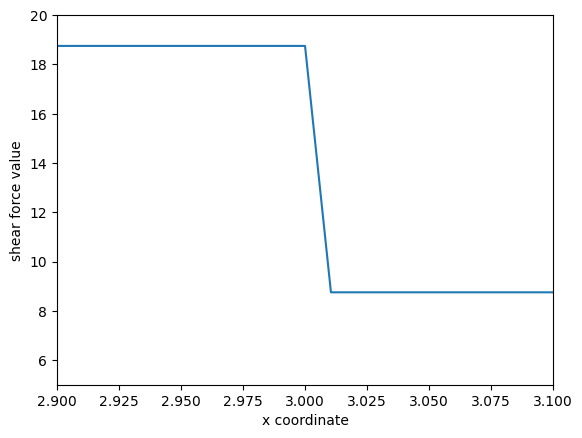

In [261]:
import matplotlib.pyplot as plt

plt.plot(x,SF)
plt.xlim(2.9,3.1)
plt.ylim(5,20)
plt.xlabel('x coordinate')
plt.ylabel('shear force value')
plt.show()

This time we narrow it down to coordinates that close to the load location, we use our first load that located on x = 3 as an example. As we can see, the curve has a certain gradient from x = 3 to the next point and then continue in a flat line. This graph is slightly inaccurate because shear force at the load point should be a straight vertical line indicating that the value of shear force is on transitional between the right and left side of the load.

**But if this kind of error isn't significant for you then you can skip Refining Data cells below and proceed to Plotting Diagram Cells**

## Refining Data
As we already discussed before, we actually want our graph to look like this:

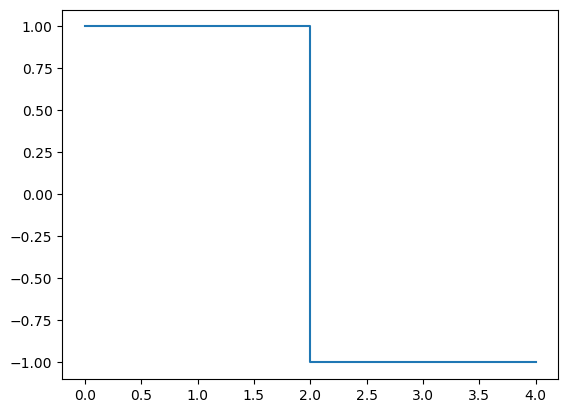

In [262]:
X = [0,1,2,2,3,4]
# Notice that we are repeating X = 2 coordinate
Y = [1,1,1,-1,-1,-1]
plt.plot(X,Y)
plt.show()

As we can see to get a perfect vertical line, we need two points that are in the **same x-coordinate** but with **different y-coordinate**

So as the solution for the problem, we need to insert a new x-point to our list of x coordinate at every our load's location. Hence we also need to insert SF and BM value for each new point. We will use SF value at next to our new point. For example in our first load that is located at x = 3, we will create a new point that also located at x = 3 but with SF values at x = 3.0104... ;   This is due to 'greater than' logic that we used in Shear Force Calculation

In [263]:
for i in range(len(load)):
    for j in range(len(x)):
        if x[j] == x[j+1]:
            break
        elif x[j]==load[i][1]:
            x.insert(j+1,x[j])
            SF.insert(j+1,SF[j+1])
            BM.insert(j+1,BM[j])
            break

To check whether our data is correct we can perform the same plot that we used before

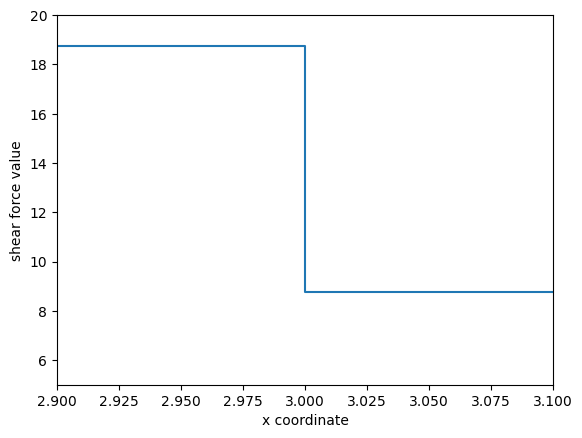

In [264]:
import matplotlib.pyplot as plt

plt.plot(x,SF)
plt.xlim(2.9,3.1)
plt.ylim(5,20)
plt.xlabel('x coordinate')
plt.ylabel('shear force value')
plt.show()

Straight vertical line at load's location (x = 3). Our data is already refined! We can proceed to plot the whole diagram

## Plotting Diagram

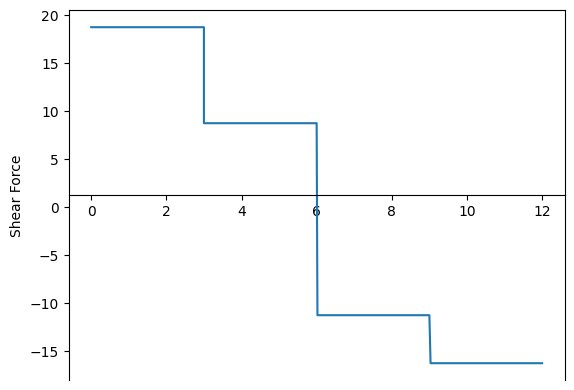

In [265]:
# I also add arguments to move the x-axis to the center of the diagram (Optional)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')

plt.plot(x,SF)
plt.ylabel('Shear Force')
plt.show()

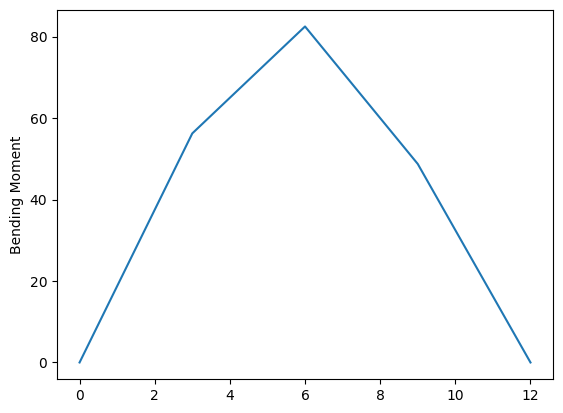

In [266]:
plt.plot(x,BM)
plt.ylabel('Bending Moment')
plt.show()

## Full Code
Here is the full code that you can copy and paste to your own script so you can tweak the number and values of load and it's location or you can directly run the cell to see the output

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input beam length
L = 12

# Input beam load and its location in [load,location] format
load = [[10,3],[20,6],[5,9]]

# create array of x axis and convert it into list so we can easily modify them
x = np.linspace(0,L,24*L)
x = x.tolist()

# Modify array of x axis so that it contains load's location
for i in range(len(load)):
    for j in range(len(x)):
        if x[j] == load [i][1]:
            break
        elif x[j] > load[i][1]:
            x.insert(j,load[i][1])
            break
            
# Calculate the reaction at both support (let's call the left one "A" and the right one "B")
# First thing we need to do is to figure out the total load on beam and total moment exerted by all of our load towards A point
P = 0
M_A = 0
for i in range(len(load)):
    P = P + load[i][0]
    M_A = M_A + load[i][0]*load[i][1]

# Then we can calculate reaction at B by using moment equilibrium principle
B = M_A/L
A = P - B

# Shear Force and Bending Moment Calculation
SF = []
BM = []
for i in range(len(x)):
    sum_SF = A
    sum_BM = A*x[i]
    for j in range(len(load)):
        if x[i] > load[j][1]:
            sum_SF -= load[j][0]
            sum_BM -= load[j][0]*(x[i]-load[j][1])
    SF.append(sum_SF)
    BM.append(sum_BM)

#Refining Data    
for i in range(len(load)):
    for j in range(len(x)):
        if x[j] == x[j+1]:
            break
        elif x[j]==load[i][1]:
            x.insert(j+1,x[j])
            SF.insert(j+1,SF[j+1])
            BM.insert(j+1,BM[j])
            break
            
# Plotting SF Diagram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
plt.plot(x,SF)
plt.ylabel('Shear Force')
plt.show()

# Plotting BM Diagram
plt.plot(x,BM)
plt.ylabel('Bending Moment')
plt.show()